In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('data/peak data csv/sample0.csv')

In [4]:
data.head()

,t,y
0,0.203317,4800.0
1,0.206650,5017.0
2,0.209983,5202.0
3,0.213317,5361.0
4,0.216650,5520.0


In [5]:
t=array(data.t)
y=array(data.y)

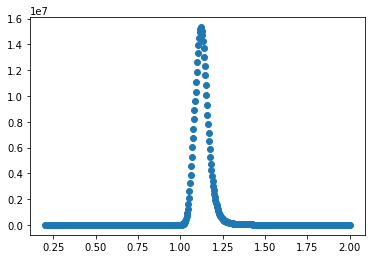

In [6]:
plot(t,y,'o')

In [7]:
from lmfit import *

In [8]:
model=models.GaussianModel()

In [9]:
results=model.fit(y,x=t,amplitude=1e7,center=1,sigma=1)
results

(0.9, 1.3)

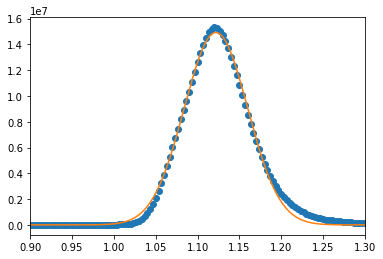

In [13]:
x_fake=linspace(0,2,2000)
y_fake=results.eval(x=x_fake)
plot(t,y,'o')
plot(x_fake,y_fake,'-')
xlim([.9,1.3])

In [14]:
results.best_values

{'amplitude': 1418780.9522041704,
 'center': 1.121910943004096,
 'sigma': 0.037922626718622565}

In [17]:
results.params['amplitude'].value

1418780.9522041704

In [18]:
p=results.params['amplitude']

In [19]:
p.value

1418780.9522041704

In [20]:
p.stderr

4100.737183200863

## Outline

Goal: find the amplitudes for all of the peaks in the peak data csv folder.

- get list of the files
- for each of the files do... (call the current file "filename")

    - load the file (x,y)
    - fit the data
    - get the amplitude information
    - store that amplitude information

In [23]:
def get_amplitude(filename):
    data=pd.read_csv(filename)
    t=array(data.t)
    y=array(data.y)    
    model=models.GaussianModel()
    results=model.fit(y,x=t,amplitude=1e7,center=1,sigma=1)

    p=results.params['amplitude']
    
    return p.value

In [24]:
value=get_amplitude('data/peak data csv/sample0.csv')
value

1418780.9522041704

In [25]:
from sci378 import Storage

Version:  0.0.7


In [ ]:
S=Storage()

for filename in ['data/peak data csv/sample0.csv','data/peak data csv/sample1.csv','data/peak data csv/sample2.csv']:
    pass



In [29]:
S=Storage()

for filename in ['data/peak data csv/sample0.csv',
                 'data/peak data csv/sample1.csv',
                 'data/peak data csv/sample2.csv',
                ]:
    value=get_amplitude(filename)
    print(filename,value)
    
    S+=value,

amplitudes=S.arrays()
amplitudes

data/peak data csv/sample0.csv 1418780.9522041704
data/peak data csv/sample1.csv 1422016.9061841858
data/peak data csv/sample2.csv 109600.79704749785


array([1418780.95220417, 1422016.90618419,  109600.7970475 ])

In [30]:
from glob import glob

In [33]:
glob('data/*.txt')

['data/g149novickB.txt', 'data/g149novickA.txt', 'data/population_data.txt']

In [34]:
glob('data/*.zip')

['data/multiple peak data csv.zip', 'data/time series.zip']

In [35]:
S=Storage()

for filename in glob('data/peak data csv/*.csv'):
    value=get_amplitude(filename)
    #print(filename,value)
    
    S+=value,

amplitudes=S.arrays()
amplitudes

array([  644370.70160755,    43529.5849211 ,    44496.64201454,
        6825359.52336162,   831298.35874001,  4684916.97865205,
          52153.39898291,    18285.40596034,    56175.59463949,
          56751.76011061,    47303.1151509 ,    53283.91098619,
          51428.03678982,    23016.15695352,    48234.56873175,
          46565.40854552,   135686.39010523,    56392.24919114,
          42394.93853606,    35153.87846182,    55806.20817232,
          21014.97825169,  4768057.29727724,    28366.0216831 ,
         692628.22137372,    44541.37224358,    27678.29126169,
         640939.60416725,   382895.4182428 ,    47730.37300212,
          49236.58943912,  7383032.58877112,    20805.57540673,
          20978.66397838,    45200.50174364,   944242.56080017,
          44569.48090693,    48565.80955055,    46559.49802618,
          54191.95804192,    45327.33322606,    47515.83022357,
         338097.7601385 ,  1176094.06277907,  2920118.33277214,
          50192.10801475,    48731.44657

## Michael Crichton

- need temperature vs time data for all of the station (csv files in one folder)
- need rural/urban info for each station
- location (latitude, logitude) for each station


- for each file do ....
    - load data
    - fit to a line
    - get the slope of the line
    - store those values


- average of all the slopes?  (X)
- count all positives/negatives for rural, urban -- fraction of positive for rural vs urban
- average urban average rural, look statistical test on the average

- go through all the urban stations
    - find the closest rural station
    - I already have the slopes - rural slope value, and an urban slope value
    
- plot the difference (histogram)
- plot rural slope (y-axis) vs urban slope (x-axis)
